# Model Building and Evaluation

In this notebook, we will build and evaluate machine learning models to predict stock prices.


In [1]:
# Import libraries
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.cluster import KMeans


In [2]:
# Load Dataset
data= pd.read_csv('./data/engineered_weekly_stock_market.csv')

data.head()

,companyName,date,openingPrice,highestPrice,lowestPrice,closingPrice,volume,year,month,day_of_month,week_of_year,price_range,price_change,weekly_return,log_volume,moving_avg_4,ema_4,volatility_4
0,AMEN BANK,2014-06-16,-0.104873,-0.105238,-0.105602,-0.105532,-0.111736,2014,6,16,25,-0.069502,-0.067207,-0.608059,-0.506038,-0.134304,-0.105530,-0.129781
1,AMEN BANK,2014-06-23,-0.105491,-0.105851,-0.106085,-0.106023,-0.105668,2014,6,23,26,-0.077417,-0.056514,-0.504264,0.336594,-0.134304,-0.105727,-0.129781
2,AMEN BANK,2014-06-30,-0.105983,-0.106064,-0.106466,-0.106136,-0.099024,2014,6,30,27,-0.068063,-0.024434,-0.159442,0.583623,-0.134304,-0.105891,-0.129781
3,AMEN BANK,2014-07-07,-0.105983,-0.105814,-0.106708,-0.106036,-0.111046,2014,7,7,28,-0.039998,-0.015879,-0.065430,-0.243828,-0.105453,-0.105948,-0.106254
4,AMEN BANK,2014-07-14,-0.105870,-0.105826,-0.105818,-0.106023,-0.110070,2014,7,14,29,-0.091090,-0.024434,-0.159025,-0.046500,-0.105576,-0.105978,-0.125022


In [3]:
# Define features and target variable
X = data.drop(columns=['closingPrice','companyName','date'])
y = data['closingPrice']

# Convert closing price to categorical for classification metrics (binary classification)
threshold = y.median()
y_class = (y > threshold).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, y_test_class = train_test_split(y_class, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30903, 15) (7726, 15) (30903,) (7726,)


In [4]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

In [5]:
# Training function 
def train_model(model,X_train,y_train):
    model.fit(X_train,y_train)
    return model

In [6]:
# Evaluation function 
def evaluate_model(model,X_test,y_test,y_test_class,threshold):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    y_pred_class = (y_pred > threshold).astype(int)
    
    accuracy = accuracy_score(y_test_class,y_pred_class)
    precision = precision_score(y_test_class,y_pred_class)
    recall = recall_score(y_test_class,y_pred_class)
    f1 = f1_score(y_test_class,y_pred_class)

    return mse, mae, r2, accuracy, precision, recall, f1

In [7]:
evaluation_results = {}

for model_name, model in models.items():
    trained_model = train_model(model, X_train, y_train)
    
    mse, mae, r2, accuracy, precision, recall, f1 = evaluate_model(trained_model, X_test, y_test, y_test_class, threshold)

    evaluation_results[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print the results
for model_name, metrics in evaluation_results.items():
    print(f"Results for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print() 

Results for Linear Regression:
MSE: 2.642177927141393e-30
MAE: 1.2151109684510542e-15
R2: 1.0
Accuracy: 0.9994822676676158
Precision: 0.9989642672190575
Recall: 1.0
F1 Score: 0.9994818652849741

Results for Decision Tree:
MSE: 8.678039829717652e-05
MAE: 0.0008825566523249879
R2: 0.9999141352289785
Accuracy: 0.9976702045042712
Precision: 0.9979253112033195
Recall: 0.9974079834110938
F1 Score: 0.9976665802437128

Results for Random Forest:
MSE: 4.876320357515196e-05
MAE: 0.0006495686210423754
R2: 0.999951751301084
Accuracy: 0.9985762360859436
Precision: 0.9987036556909515
Recall: 0.9984447900466563
F1 Score: 0.9985742060920286

Results for Support Vector Machine:
MSE: 0.9851541888697759
MAE: 0.1993045800381389
R2: 0.025240255772834175
Accuracy: 0.4993528345845198
Precision: 0.4993528345845198
Recall: 1.0
F1 Score: 0.6660911602209945

Results for K-Nearest Neighbors:
MSE: 0.0110783582468156
MAE: 0.025366883998188445
R2: 0.989038530442111
Accuracy: 0.5392182241781
Precision: 0.527249451353

In [19]:
#K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Adding cluster information to the dataframe
data['cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[-3.06239465e-03 -3.24562974e-03 -3.10478923e-03 -7.89211650e-03
   2.01806688e+03  9.39355068e+00  1.59191299e+01  3.95252244e+01
  -1.07553692e-02 -1.96475033e-02 -1.19710114e-02 -1.56484327e-02
  -2.76161206e-03 -2.98446359e-03 -1.49696573e-02]
 [ 3.19473235e-03  3.38588572e-03  3.23895895e-03  8.23316480e-03
   2.01888681e+03  3.58023908e+00  1.55544801e+01  1.34665715e+01
   1.12201496e-02  2.04965464e-02  1.24883242e-02  1.63246609e-02
   2.88095180e-03  3.11343359e-03  1.56165530e-02]]


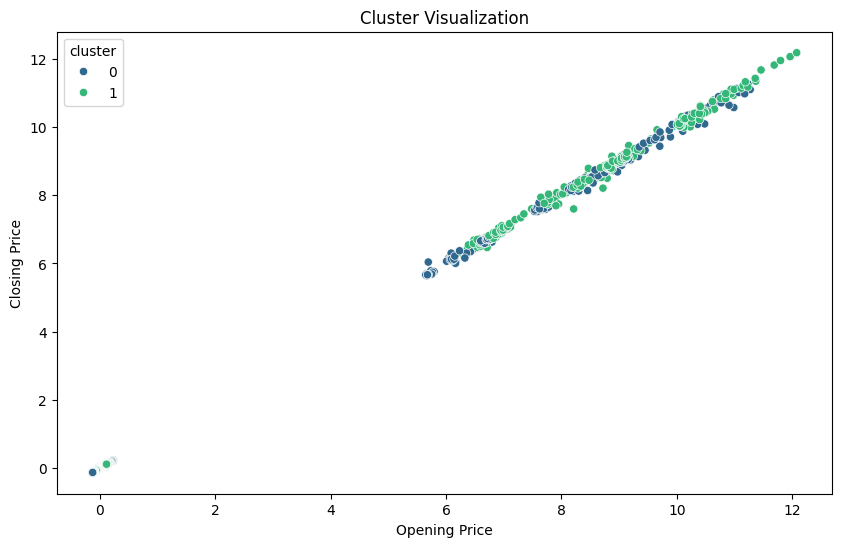

In [20]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['openingPrice'], y=data['closingPrice'], hue=data['cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()


/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

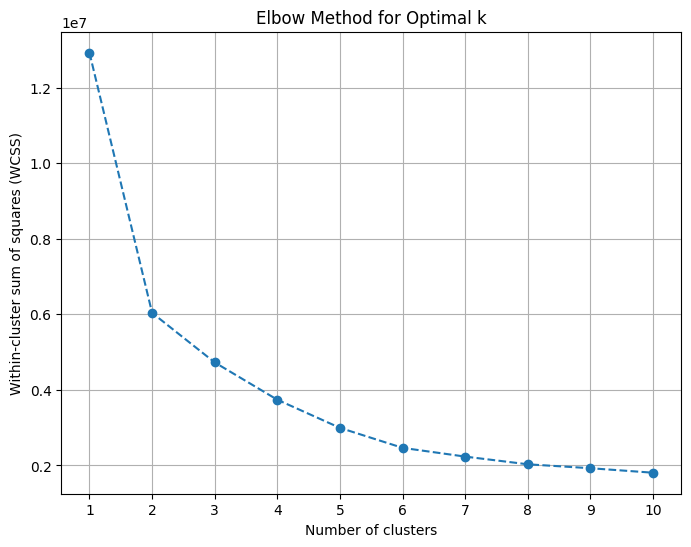

In [14]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/scrapy_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

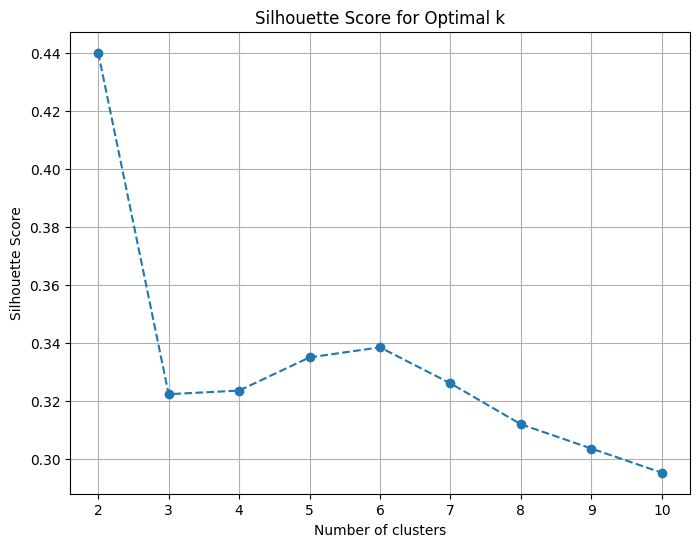

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
